# DIT821 Software Engineering for AI systems - exam 2020-08-17


### Assignement: ML engineering 

* Name, e-mail:

In [91]:
#Haider Ali, gushaial@student.gu.se

### Assignement description


You are provided with the `Personal Health Cost` dataset that contains information about individual medical costs billed by a health insurance company. The dataset contains the following information:

- **Age**: age of primary beneficiary
- **Sex**: insurance contractor gender, female, male
- **BMI**: Body mass index, providing an understanding of body weights that are relatively high or low relative to height objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **Children**: Number of children covered by health insurance / Number of dependents
- **Smoker**: Smoking
- **Region**: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- **Charges**: Individual medical costs billed by health insurance


You are required to prepare the dataset for ML algorithm by performing the following:

1. Create a Panda's DataFrame and print its basic characteristics
2. Explore data through visualization (e.g., histograms, scatterplots and pivot tables) and correlations. Comment your selected data analysis and what you intend to achieve with it
3. Prepare dataset by handling missing values, removing outliers and perfoming one-hot encoding
4. Based on data exploration, state what features would you recommend for training an initial linear ML model. 

You can access the following documentation to achieve above: 
- Panda's Documentation :<https://pandas.pydata.org/pandas-docs/stable/reference/frame.html>
- Matplotlibrary Documentation:<https://matplotlib.org/3.3.0/api/pyplot_summary.html>


In [104]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [105]:
# 1. Create a Panda's DataFrame and print its basic characteristics
# ===== YOUR CODE HERE ==========
#importing the file 
exam_dataframe = pd.read_csv('./personal_health_dirty.csv')

# Print shape of the dataframe imported
print('Shape: \n', exam_dataframe.shape)

# Print DataFrame.info() 
#  ===== YOUR CODE HERE ==========    
print('\n\nBasic information regarding dataframe: \n',exam_dataframe.info())

# #  ===== YOUR CODE HERE ==========
print('\n\First five rows of the Data : \n', exam_dataframe.head())

print('\n\n Dataframe : \n')
exam_dataframe

Shape: 
 (1338, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1326 non-null   float64
 4   smoker    1321 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


Basic information regarding dataframe: 
 None

\First five rows of the Data : 
    age     sex     bmi  children smoker     region      charges
0   19  female  27.900       0.0    yes  southwest  16884.92400
1   18    male  33.770       1.0     no  southeast   1725.55230
2   28    male  33.000       3.0     no  southeast   4449.46200
3   33    male  22.705       0.0     no  northwest  21984.47061
4   32    male  28.880       0.0     no  northwest   3866.8

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830
1334,18,female,31.920,0.0,no,northeast,2205.98080
1335,18,female,36.850,0.0,no,southeast,1629.83350
1336,21,female,1.000,0.0,no,southwest,2007.94500


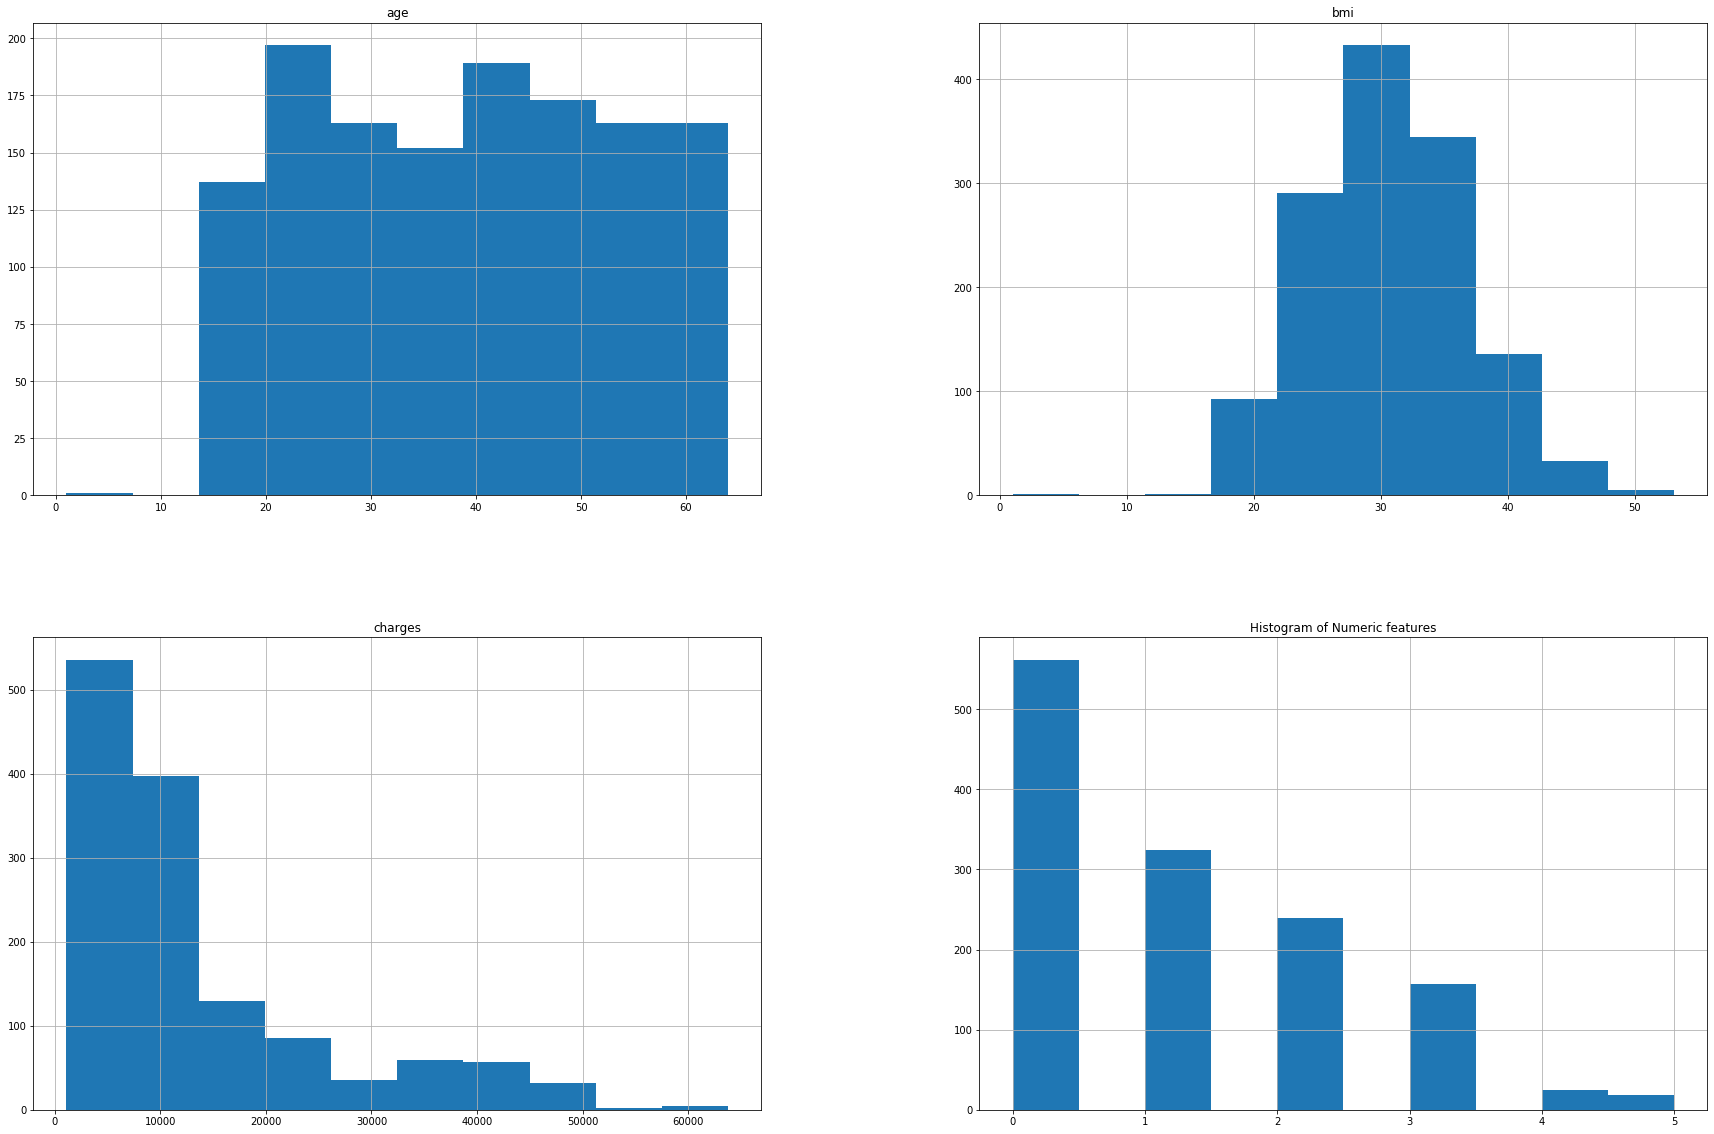

In [106]:
# 2. Explore data through visualization and correlations. 
# Comment the selected data analysis and what you intend to achieve with it
# ===== YOUR CODE HERE ==========
exam_dataframe.hist(figsize=(30,20))
plt.title('Histogram of Numeric features')
plt.show()


In [107]:
#Feature Correlations
feature_correlations = exam_dataframe.corr()
print(feature_correlations['charges'].sort_values(ascending=False))


charges     1.000000
age         0.294275
bmi         0.199461
children    0.069573
Name: charges, dtype: float64


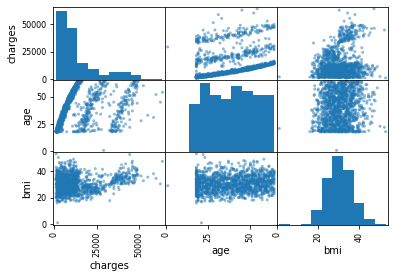

In [108]:
#we see that the feature charges is MOSTLY correlated to the Age feature

scatter_features = pd.DataFrame(exam_dataframe,columns=['charges', 'age', 'bmi'])

pd.plotting.scatter_matrix(scatter_features,  diagonal= 'hist')
plt.show()



Dataframe before taking off the outliers :  (1338, 7)


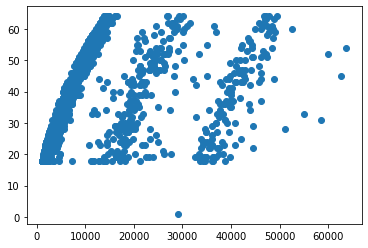



Dataframe before taking off the outliers from CHARGES :  (1331, 7)


Dataframe before taking off the outliers from AGE :  (1330, 7)


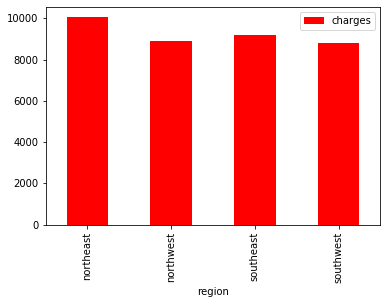

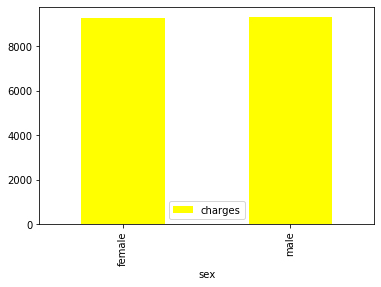

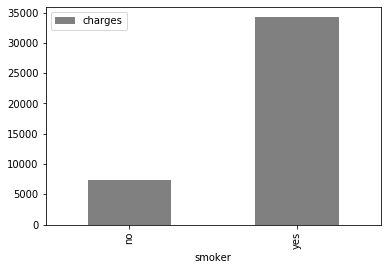

In [109]:
# 3. Prepare dataset (handle missing values, outliers and perform one-hot encoding)
# ===== YOUR CODE HERE ==========


def missing_in_dataframe(df):
    missing_count = df.isnull().sum().sort_values(ascending= False)
    missing_count = missing_count[missing_count != 0]
    return missing_count
    

print('\n\nDataframe before taking off the outliers : ',exam_dataframe.shape)
plt.scatter(scatter_features['charges'],scatter_features['age'])
plt.show()
#we can see that there are some outliers when the charges are over 50000 so we remove them and from age < 10 too 
df_outlier = exam_dataframe.loc[exam_dataframe['charges'] > 50000]
exam_dataframe = exam_dataframe.drop(df_outlier.index)
print('\n\nDataframe before taking off the outliers from CHARGES : ',exam_dataframe.shape)

df_outlier = exam_dataframe.loc[exam_dataframe['age'] < 10]
exam_dataframe = exam_dataframe.drop(df_outlier.index)
print('\n\nDataframe before taking off the outliers from AGE : ',exam_dataframe.shape)

#RELATIONSHIP WITH PIVOT TABLE AND CATEGORICAL VALUES IN THE DATAFRAME

region_pivot = exam_dataframe.pivot_table(index='region', values='charges', aggfunc=np.median)
region_pivot.plot(kind='bar',label='Sale Condition',color='Red')

sex_pivot = exam_dataframe.pivot_table(index='sex', values='charges', aggfunc=np.median)
sex_pivot.plot(kind='bar',label='Sale Condition',color='Yellow')

smoker_pivot = exam_dataframe.pivot_table(index='smoker', values='charges', aggfunc=np.median)
smoker_pivot.plot(kind='bar',label='Sale Condition',color='Gray')


In [110]:

#we can see that the smokers have much much higher health charges than the non smokers in the pivot table 


#Missing values in the Dataframe
print('Missing Values in the Dataframe : \n',missing_in_dataframe(exam_dataframe))

#Since Children are numerical values and the number of children data missing is only 12 we can fill it with the mean value
exam_dataframe['children'] = exam_dataframe['children'].transform(lambda x: x.fillna(x.median()))

#since Smoker are categorical we filll the missing with 'no'
exam_dataframe['smoker'] = exam_dataframe['smoker'].fillna("None")

#Missing values in the Dataframe
print('Missing Values in the Dataframe AGAIN : \n',missing_in_dataframe(exam_dataframe))

print('\n\n\n')


#Apply one hot encoding for all the catagorical values
exam_dataframe = pd.get_dummies(exam_dataframe)

# Print DataFrame shape of features and target variable
print('Shape of features after one-hot encoding:\n', exam_dataframe.shape)


Missing Values in the Dataframe : 
 smoker      17
children    12
dtype: int64
Missing Values in the Dataframe AGAIN : 
 Series([], dtype: int64)




Shape of features after one-hot encoding:
 (1330, 13)


In [111]:
# 1. Separate the features from the target (charges) in the already prepared and cleaned dataset
# ===== YOUR CODE HERE ==========
data_features = exam_dataframe.drop(columns='charges', axis =1) 
data_target = exam_dataframe["charges"].copy() 
data_target.columns = ['charges']

print('Shape of dataset : ', data_features.shape)
print('Shape of target : ', data_target.shape)
data_features

Shape of dataset :  (1330, 12)
Shape of target :  (1330,)


,age,bmi,children,sex_female,sex_male,smoker_None,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0.0,1,0,0,0,1,0,0,0,1
1,18,33.770,1.0,0,1,0,1,0,0,0,1,0
2,28,33.000,3.0,0,1,0,1,0,0,0,1,0
3,33,22.705,0.0,0,1,0,1,0,0,1,0,0
4,32,28.880,0.0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1332,52,44.700,3.0,1,0,0,1,0,0,0,0,1
1333,50,30.970,3.0,0,1,0,1,0,0,1,0,0
1334,18,31.920,0.0,1,0,0,1,0,1,0,0,0
1335,18,36.850,0.0,1,0,0,1,0,0,0,1,0


In [112]:
# 2. Split dataset into train and test set
# ===== YOUR CODE HERE ==========
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size= 0.2, random_state=0)



In [113]:
# 3. Train and evaluate a simple linear regression model on all features
# ===== YOUR CODE HERE ==========
model = LinearRegression()
model.fit(X_train, y_train)

#calculating predictions with the LR model
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

#calculating the R^2 for both sets by comparing predictions with training data
r_2_train = mean_squared_error(y_train, Y_train_pred)
r_2_test = mean_squared_error(y_test, Y_test_pred)


print('R^2 trainig data: ', r_2_train)
print('R^2 test data: ', r_2_test)

R^2 trainig data:  34474787.37412767
R^2 test data:  31371809.523426175


In [114]:
# 4. Train and evaluate a simple linear model on selected features 
# (age, bmi, children, smoker (one-hot encoding))
new_data_features = pd.DataFrame([data_features.age, data_features.bmi, data_features.children , data_features.smoker_no, data_features.smoker_yes]).transpose()
new_data_features
X_train, x_test, Y_train, y_test = train_test_split(new_data_features,
                                                    data_target,
                                                   test_size=0.2,
                                                    random_state=0)

# Train and evaluate
model = LinearRegression()
model.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(x_test)

r_2_train = mean_squared_error(Y_train, Y_train_pred)
r_2_test = mean_squared_error(y_test, Y_test_pred)


print('R^2 trainig data: ', r_2_train)
print('R^2 test data: ', r_2_test)

R^2 trainig data:  34635180.48775554
R^2 test data:  31499158.55526453


### 4. Feature Selection

#### Selected features for initial model are:

#### Rationale:



In [ ]:
### Lucy's
# 1. Create a panda's Dataframe and print its basic characteristics
personal_health_data = pd.read_csv('./personal_health_dirty.csv')

print('Shape (1338, 7): ', personal_health_data.shape)
personal_health_data.info()
print(personal_health_data.describe(exclude=np.number))


# 2. Explore data
## Histogram
#personal_health_data.hist(figsize=(20,10))

## Scatter matrix
pd.plotting.scatter_matrix(personal_health_data, figsize=(10,10))
plt.show()

# Scatter plot of Charges and bmi, age
#plt.scatter(personal_health_data.charges,personal_health_data.age)
#plt.show() ## remove outlier age below 10

## Correlations
# personal_health_data.corr()

## Pivot table
smoker_pivot = personal_health_data.pivot_table(index='smoker', values='charges', 
                                                aggfunc=np.median, fill_value='no')
smoker_pivot.plot(kind='bar',label='Smoker',color='blue')


sex_pivot=  personal_health_data.pivot_table(index='sex', values='charges', 
                                                aggfunc=np.median)
sex_pivot.plot(kind='bar',label='Sex',color='blue')


region_pivot = personal_health_data.pivot_table(index='region', values='charges', 
                                                aggfunc=np.median)
region_pivot.plot(kind='bar',label='Region',color='blue')

# 3. Prepare dataset
## Remove outlier bmi less than 10
row_index = personal_health_data.loc[personal_health_data['bmi']<10]
personal_health_data = personal_health_data.drop(row_index.index)
print('Shape: (1337, 7)',personal_health_data.shape)

## Fill missing for children (Null with 0) and smoker (Null with 'no' )
# Fill nulls for children (Null with 0)
personal_health_data['children'].fillna(0, inplace=True)

# Fill nulls for smoker (Null with 'no' )
personal_health_data['smoker'].fillna(value="no", inplace=True)

# Check no missing
print(personal_health_data.isna().sum().sort_values(ascending= False))


## Features: age, bmi, children, smoker (one-hot encoding), region (one-hot encoding)

## Submit the solution

When you completed the excercise, download (form File menu) this file as a jupyter Notebook file (.ipynb) and uplaod this file in the CANVAS 

*By writing down my name I declare that I have done the assignements myself

* First Name  Last Name: